## EDA

### Importación de los datos

Se ha realizado la importación de los archivos `CSV` correspondientes a los experimentos. Los datos han sido organizados en variables dinámicas (`df_`) para facilitar el acceso en los análisis posteriores. Se validó la correcta carga mostrando las primeras filas de cada conjunto, organizadas en una cuadrícula para su inspección.



In [5]:
# Importar las librerías necesarias
import pandas as pd
import os
from IPython.display import display

# Ruta a la carpeta donde se encuentran los archivos de entrenamiento
train_folder = '/Users/josejavier-yenifer/Documents/Serie de Tiempo/Bono 1/train'

# Nombres de los archivos CSV
train_files = ['ex_1.csv', 'ex_9.csv', 'ex_20.csv', 'ex_21.csv', 'ex_23.csv', 'ex_24.csv']

# Cargar los archivos CSV en variables con prefijo 'df_' y nombre del archivo (sin .csv)
dfs = []
for file in train_files:
    file_name = file.split('.')[0]  # Eliminar la extensión .csv
    file_path = os.path.join(train_folder, file)
    
    # Crear una variable dinámica con el nombre df_<nombre_archivo>
    globals()[f"df_{file_name}"] = pd.read_csv(file_path)

    # Guardar el DataFrame para mostrar luego
    dfs.append((file_name, globals()[f"df_{file_name}"]))

# Mostrar los DataFrames en una cuadrícula de 3 columnas por 2 filas
rows, cols = 2, 3
index = 0
for r in range(rows):
    for c in range(cols):
        if index < len(dfs):
            file_name, df = dfs[index]
            print(f"Archivo: {file_name}")
            display(df.head())
            print("\n" + "-"*50 + "\n")
        index += 1





Archivo: ex_1


,time,input_voltage,el_power
0,810.07028,10,1228.791720
1,811.06938,10,1223.041745
2,812.06848,10,1244.960866
3,813.06758,10,1229.259058
4,814.06668,10,1248.117024



--------------------------------------------------

Archivo: ex_9


,time,input_voltage,el_power
0,818.84,3.445,1253.790314
1,819.84,3.445,1349.836854
2,820.84,3.445,1262.033813
3,821.84,3.445,1370.205819
4,822.84,3.445,1254.782490



--------------------------------------------------

Archivo: ex_20


,time,input_voltage,el_power
0,849.22,3.0,1238.511285
1,850.24,3.0,1149.563728
2,851.26,3.0,1226.959165
3,852.28,3.0,1158.086961
4,853.30,3.0,1230.435294



--------------------------------------------------

Archivo: ex_21


,time,input_voltage,el_power
0,847.72,3.0,1089.895066
1,848.74,3.0,1179.843179
2,849.78,3.0,1099.497553
3,850.80,3.0,1181.551142
4,851.82,3.0,1100.823819



--------------------------------------------------

Archivo: ex_23


,time,input_voltage,el_power
0,810.00,3.0,1102.949693
1,811.04,3.0,1199.403786
2,812.08,3.0,1113.199817
3,813.18,3.0,1200.377939
4,814.18,3.0,1105.465349



--------------------------------------------------

Archivo: ex_24


,time,input_voltage,el_power
0,811.04,3.0,1217.413110
1,812.04,3.0,1140.090013
2,813.06,3.0,1223.751987
3,814.10,3.0,1124.810110
4,815.12,3.0,1207.671543



--------------------------------------------------



### Conteo de valores nulos

Se muestra una tabla que cuenta la cantidad de valores `nulos` o `faltantes` en cada columna de los diferentes conjuntos de datos. 


In [25]:
# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Almacenar los resultados de los datos nulos
null_counts = {}

# Iterar sobre los DataFrames para contar los valores nulos
for df, name in zip(dataframes, names):
    null_counts[name] = df.isnull().sum()

# Convertir los resultados en un DataFrame
null_counts_df = pd.DataFrame(null_counts)

# Mostrar la tabla con los resultados
null_counts_df


,ex_1,ex_9,ex_20,ex_21,ex_23,ex_24
time,0,0,0,0,0,0
input_voltage,0,0,0,0,0,0
el_power,0,0,0,0,0,0



No hay datos faltantes en ninguna de las columnas (`time`, `input_voltage`, y `el_power`) para todos los conjuntos de datos. Esto indica que los datos están completos y no se requiere ningún tratamiento adicional para manejar valores ausentes antes del análisis.



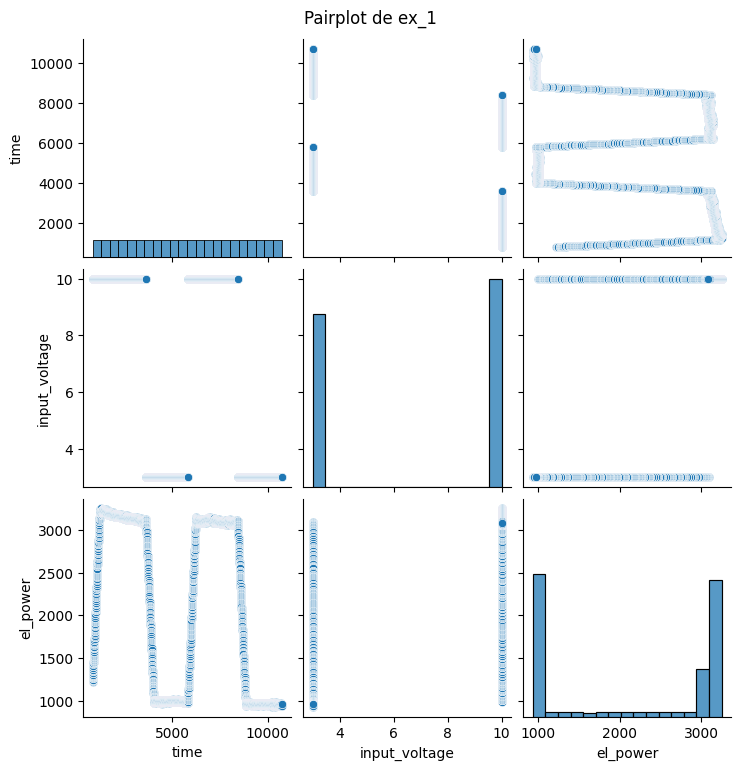

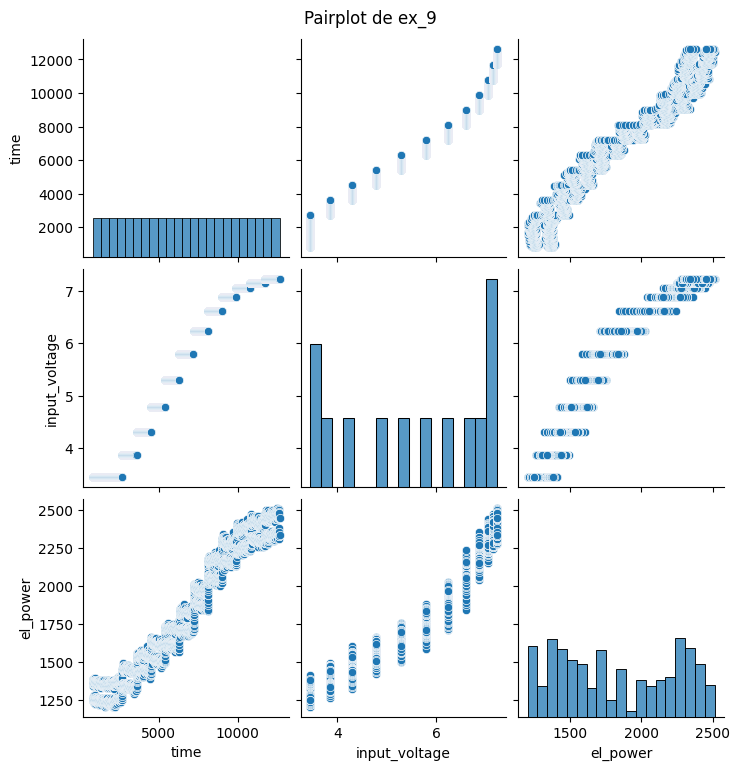

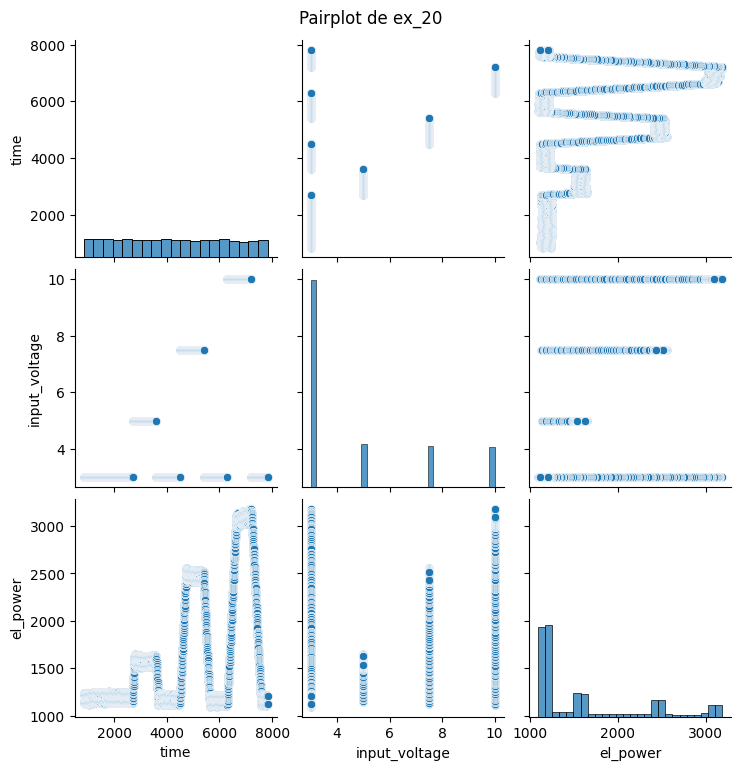

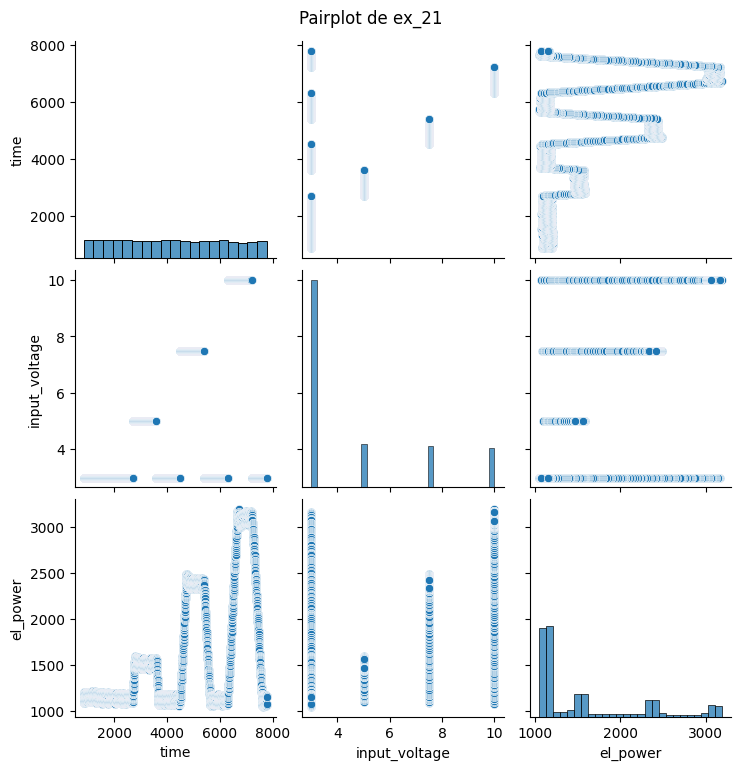

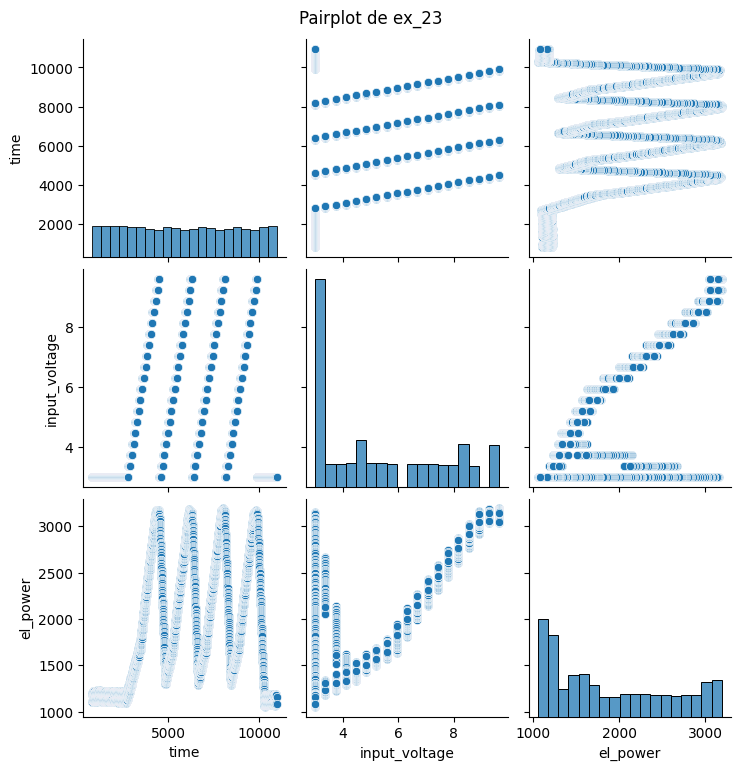

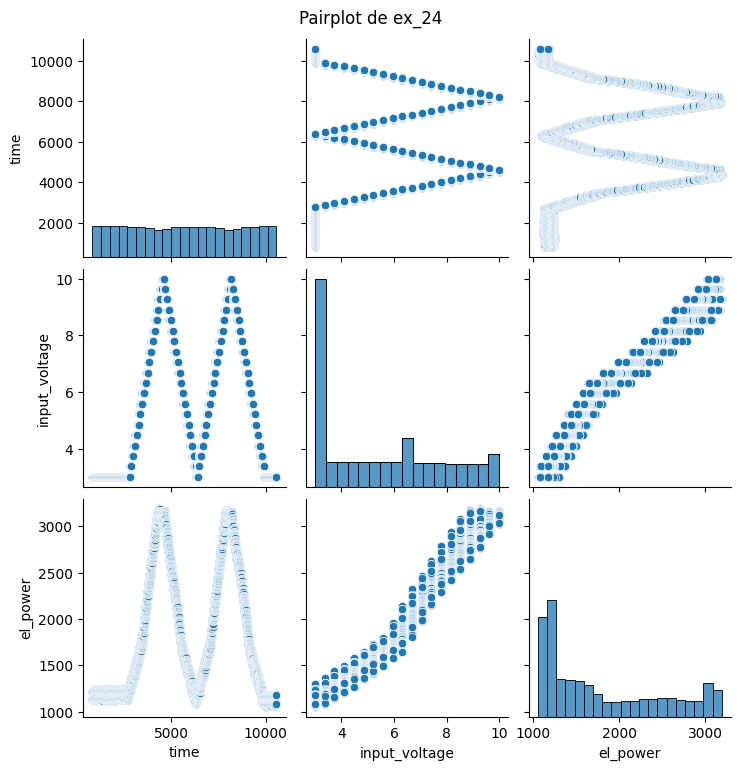

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Crear pairplot para cada conjunto de datos
for df, name in zip(dataframes, names):
    sns.pairplot(df)
    plt.suptitle(f'Pairplot de {name}', y=1.02)  # Ajustar el título del gráfico
    plt.show()


### Estadísticas descriptivas

Se presentan las estadísticas descriptivas de la columna `el_power` para cada conjunto de datos. Las métricas calculadas incluyen el número de observaciones, media, desviación estándar, valores mínimos y máximos, y los percentiles 25%, 50% y 75%. 


In [15]:
import pandas as pd

# Generar estadísticas descriptivas para cada DataFrame
desc_ex_1 = df_ex_1['el_power'].describe()
desc_ex_9 = df_ex_9['el_power'].describe()
desc_ex_20 = df_ex_20['el_power'].describe()
desc_ex_21 = df_ex_21['el_power'].describe()
desc_ex_23 = df_ex_23['el_power'].describe()
desc_ex_24 = df_ex_24['el_power'].describe()

# Crear un DataFrame combinando los resultados, con las métricas como filas y los conjuntos de datos como columnas
desc_combined = pd.DataFrame({
    'ex_1': desc_ex_1,
    'ex_9': desc_ex_9,
    'ex_20': desc_ex_20,
    'ex_21': desc_ex_21,
    'ex_23': desc_ex_23,
    'ex_24': desc_ex_24
})

# Mostrar el DataFrame resultante
desc_combined


,ex_1,ex_9,ex_20,ex_21,ex_23,ex_24
count,9920.000000,11819.000000,6495.000000,6495.000000,9188.000000,9023.000000
mean,2162.427874,1828.548454,1623.263494,1576.460277,1899.231847,1805.375104
std,1009.468755,402.170208,632.985147,638.042444,693.044107,680.139456
min,932.837260,1204.205671,1097.030791,1045.541020,1053.218306,1054.175250
25%,990.027512,1449.908790,1158.548696,1112.552610,1212.052789,1221.472869
50%,2709.354147,1735.783127,1241.345876,1191.245597,1694.534657,1539.209904
75%,3116.416457,2247.396267,1909.031616,1889.461847,2508.555589,2380.490784
max,3249.891217,2511.698262,3182.431061,3191.966802,3193.846351,3191.101416



Las estadísticas descriptivas de los conjuntos de datos revelan varias diferencias clave entre los experimentos:

- `ex_1` tiene la mayor media de **potencia eléctrica** (2162 W), mientras que `ex_21` tiene la más baja (1576 W), lo que indica una variabilidad significativa en los niveles de potencia entre los experimentos.
- La **desviación estándar** más alta se observa en `ex_1` (1009 W), lo que sugiere una mayor dispersión de los datos en comparación con los otros conjuntos.
- Los valores de **mínimo** y **máximo** varían considerablemente entre los experimentos, con `ex_1` y `ex_24` mostrando los valores más altos en los extremos superiores.
- Los percentiles (25%, 50%, 75%) también reflejan diferentes patrones de distribución en los conjuntos de datos, destacando la concentración de la mayoría de las observaciones en distintos rangos de potencia.



### Distribuciones individuales de la potencia eléctrica

Se generan gráficos de densidad para la columna `el_power` de cada uno de los conjuntos de datos, organizados en una cuadrícula de 3 columnas y 2 filas. Esta visualización permite comparar fácilmente las distribuciones individuales y observar las diferencias en la potencia eléctrica entre los distintos experimentos.


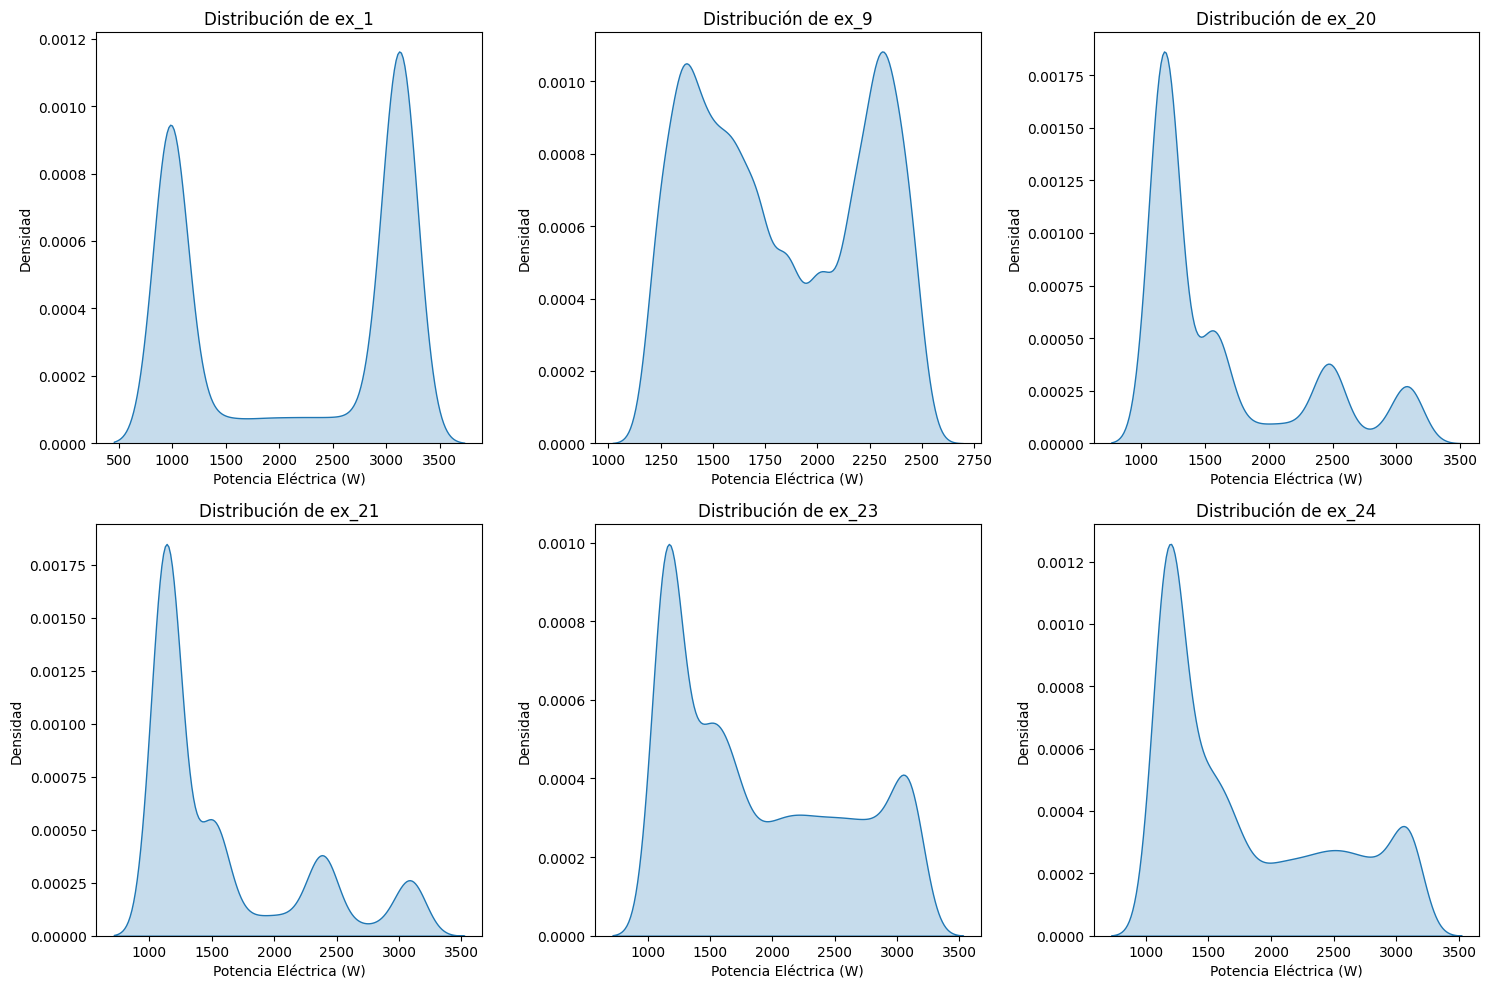

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar una cuadrícula de 3 columnas y 2 filas para los subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Iterar sobre los DataFrames y los ejes de la cuadrícula
for i, (df, name) in enumerate(zip(dataframes, names)):
    row = i // 3  # Determinar la fila del subplot
    col = i % 3   # Determinar la columna del subplot
    
    # Graficar en el subplot correspondiente
    sns.kdeplot(df['el_power'], ax=axes[row, col], fill=True)
    axes[row, col].set_title(f'Distribución de {name}')
    axes[row, col].set_xlabel('Potencia Eléctrica (W)')
    axes[row, col].set_ylabel('Densidad')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()





Las distribuciones de **potencia eléctrica** varían entre los experimentos:

- **ex_1** y **ex_9** muestran distribuciones bimodales, con dos picos dominantes.
- **ex_20**, **ex_21**, **ex_23**, y **ex_24** presentan mayor dispersión con múltiples picos, sugiriendo variabilidad en las condiciones del experimento.
- Los experimentos **ex_21**, **ex_23**, y **ex_24** comparten un patrón con un pico cerca de los 1000 vatios.



### QQ-plots de la potencia eléctrica

Se generan gráficos **QQ-plots** para la columna `el_power` de cada uno de los conjuntos de datos. Estos gráficos permiten evaluar visualmente si los datos siguen una distribución normal, comparando los cuantiles observados con los cuantiles teóricos de una distribución normal.

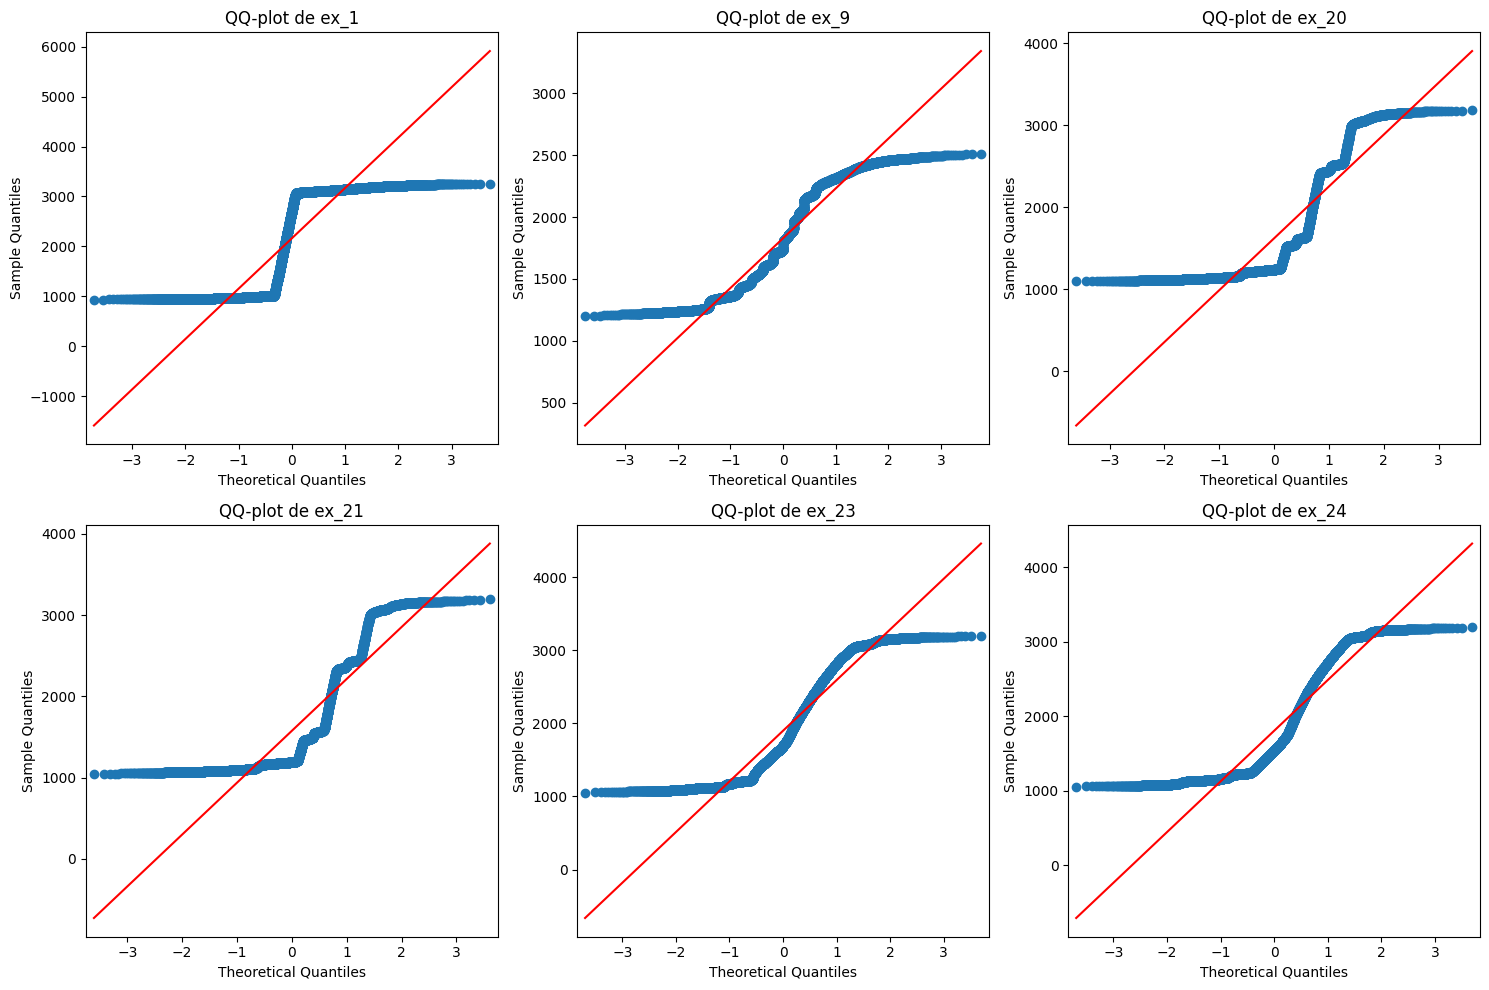

In [14]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Configurar una cuadrícula de 3 columnas y 2 filas para los subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Iterar sobre los DataFrames y los ejes de la cuadrícula
for i, (df, name) in enumerate(zip(dataframes, names)):
    row = i // 3  # Determinar la fila del subplot
    col = i % 3   # Determinar la columna del subplot
    
    # Generar el QQ plot en el subplot correspondiente
    qqplot(df['el_power'], line='s', ax=axes[row, col])
    axes[row, col].set_title(f'QQ-plot de {name}')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Los **QQ-plots** muestran que las distribuciones de `el_power` en los distintos conjuntos de datos se desvían significativamente de una distribución normal. En general, los datos exhiben patrones escalonados y curvados, lo que indica la presencia de no normalidad. Los valores extremos en las colas de los gráficos sugieren que los datos incluyen outliers o efectos no lineales en las mediciones de potencia eléctrica.



### Prueba de normalidad de Kolmogorov-Smirnov

Se realiza la prueba de Kolmogorov-Smirnov para evaluar la normalidad de la distribución de `el_power` en cada conjunto de datos. Los resultados indican si podemos considerar que los datos siguen una distribución normal o si debemos rechazar esta hipótesis, basándonos en un nivel de significancia de 0.05


In [24]:
import numpy as np
from scipy import stats
import pandas as pd

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Almacenar resultados de la prueba KS en un DataFrame
results = {'Dataset': [], 'Statistic': [], 'p-value': [], 'Normality': []}
alpha = 0.05  # Nivel de significancia

for df, name in zip(dataframes, names):
    # Aplicar la prueba KS para cada conjunto de datos
    stat, p = stats.kstest(df['el_power'], 'norm', args=(df['el_power'].mean(), df['el_power'].std()))
    
    # Evaluar la normalidad
    normality = 'No se rechaza H0' if p > alpha else 'Se rechaza H0'
    
    # Guardar los resultados
    results['Dataset'].append(name)
    results['Statistic'].append(stat)
    results['p-value'].append(p)
    results['Normality'].append(normality)

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar la tabla con los resultados
results_df





,Dataset,Statistic,p-value,Normality
0,ex_1,0.283479,0.000000e+00,Se rechaza H0
1,ex_9,0.122652,2.051605e-155,Se rechaza H0
2,ex_20,0.265028,0.000000e+00,Se rechaza H0
3,ex_21,0.258664,0.000000e+00,Se rechaza H0
4,ex_23,0.121091,7.330340e-118,Se rechaza H0
5,ex_24,0.152485,1.194924e-183,Se rechaza H0



La prueba de **Kolmogorov-Smirnov** aplicada a los conjuntos de datos revela que ninguno de ellos parece seguir una distribución normal. En todos los casos, el valor p es extremadamente bajo, lo que indica que se rechaza la hipótesis nula (H0) de normalidad


### Análisis de correlación 

Se generan gráficos de correlación en forma de **heatmap triangular** para los conjuntos de datos. Cada gráfico muestra las relaciones entre las variables `time`, `input_voltage`, y `el_power`.

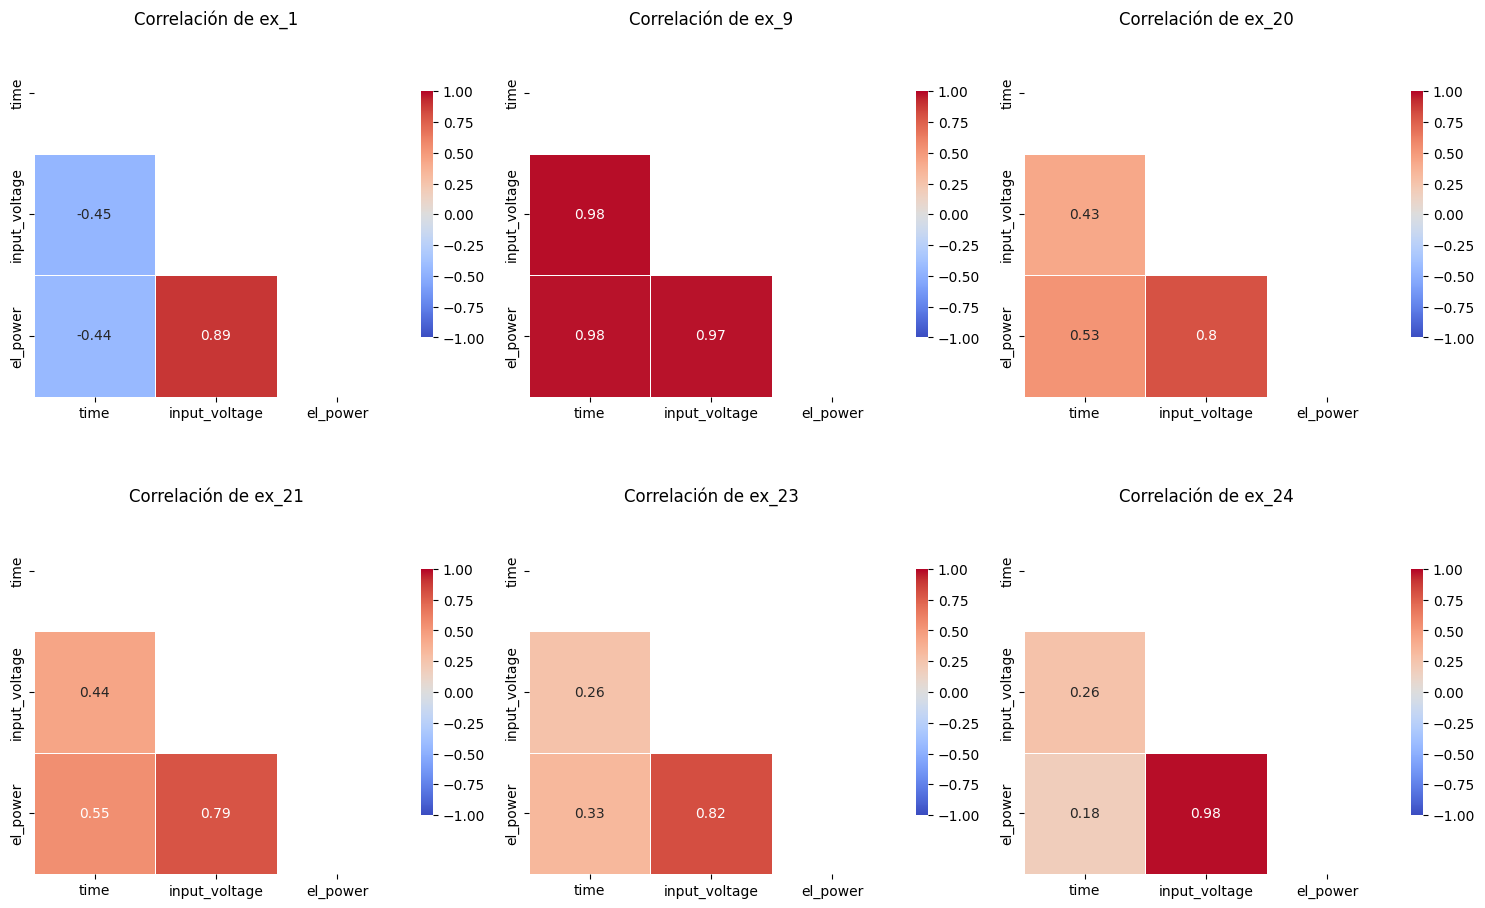

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Crear una cuadrícula de subplots para los heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (df, name) in enumerate(zip(dataframes, names)):
    row = i // 3
    col = i % 3
    
    # Calcular la correlación
    corr = df.corr()
    
    # Crear una máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Crear el heatmap con la máscara
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', ax=axes[row, col], 
                cbar_kws={"shrink": 0.5}, vmin=-1, vmax=1, square=True, linewidths=.5)
    
    # Ajustar el título de cada subplot
    axes[row, col].set_title(f'Correlación de {name}')

# Ajustar el diseño
plt.tight_layout()
plt.show()




Los **heatmaps** de correlación revelan:

- En `ex_1`, `input_voltage` y `el_power` tienen una correlación fuerte (0.89), mientras que `time` tiene una relación negativa moderada con `el_power`.
- `ex_9` muestra una correlación extremadamente fuerte entre las tres variables, especialmente entre `input_voltage` y `el_power` (0.97).
- Tanto en `ex_20` como en `ex_21`, `input_voltage` y `el_power` mantienen una correlación fuerte, con valores de 0.80 y 0.79, respectivamente.
- En `ex_23` y `ex_24`, la correlación entre `input_voltage` y `el_power` sigue siendo alta, alcanzando 0.98 en `ex_24`.



### Gráficos de series de tiempo

Se presentan las series de tiempo de la potencia eléctrica para cada conjunto de datos. Estos gráficos permiten visualizar cómo varía la potencia eléctrica en función del tiempo en los diferentes experimentos.


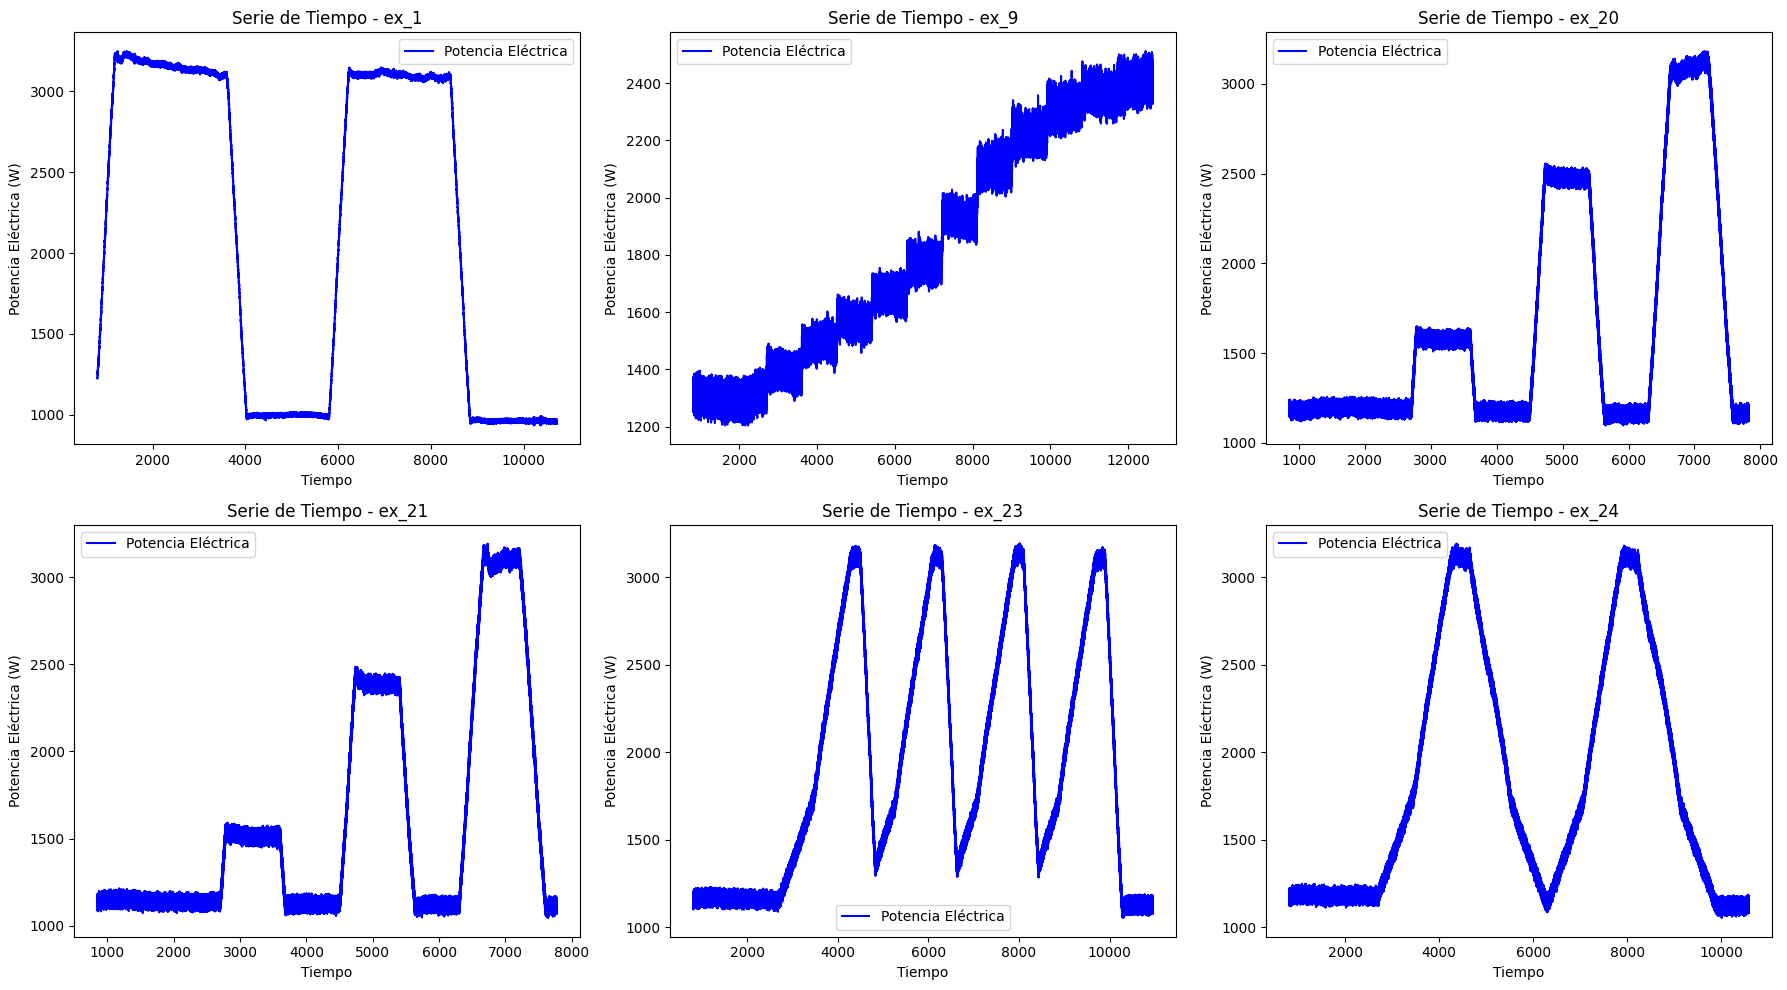

In [32]:
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Crear una cuadrícula de subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Iterar sobre los DataFrames y graficar la serie de tiempo en cada subplot
for i, (df, name) in enumerate(zip(dataframes, names)):
    row = i // 3  # Determinar la fila del subplot
    col = i % 3   # Determinar la columna del subplot
    
    # Graficar la serie de tiempo en el subplot correspondiente
    axes[row, col].plot(df['time'], df['el_power'], label='Potencia Eléctrica', color='b')
    axes[row, col].set_title(f'Serie de Tiempo - {name}')
    axes[row, col].set_xlabel('Tiempo')
    axes[row, col].set_ylabel('Potencia Eléctrica (W)')
    axes[row, col].legend()

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Los gráficos de las series de tiempo para la **potencia eléctrica** en diversos experimentos revelan características distintivas:

- `ex_1`, `ex_20`, `ex_21`, y `ex_23` exhiben patrones cíclicos o escalonados con cambios abruptos de potencia, sugiriendo transiciones entre diferentes fases de los experimentos.
- `ex_9` muestra un incremento progresivo en la potencia eléctrica a lo largo del tiempo, indicativo de un comportamiento más gradual.
- `ex_24` presenta oscilaciones regulares similares a `ex_23`, lo que sugiere ciclos consistentes en la generación de potencia.

Estos patrones indican variaciones significativas en el comportamiento de los experimentos, con la mayoría mostrando cambios rápidos en la potencia eléctrica, a excepción de `ex_9`, donde la potencia aumenta de manera más uniforme. 
